# Link Businesses to Communities


One of the challenges of working with geographic data is presenting it in forms that can communicate important relationships. For a lot of geographic data relates to urban areas, the structutre that people care about most is related to political boundaries: cities, districts or neighborhoods. Cities and towns are sensible units when they are small, but for large cities, people are more likely to be interested in neighborhoods. 

In San Diego County, the City of San Diego has well-defined communities, most of the other cities in the county are relatively small enough to consider without sub-division. There are also some communities defined in the county. All of these datasets, with geographic boundaries, are published by [SANGIS](http://sangis.org), and they are collected in the dataset [sangis.org-communities-2018](https://data.sandiegodata.org/dataset/sangis-org-communities-2018), published byt the [San Diego Regional Data Library](http://sandiegodata.org).

This notebook demonstrates how to load these geographic datasets and do a geographic perge from geographic points, to classify the points as belonging to a particularly city or community. 



In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import metapack as mp

Here is the dataset from the data library. [Visit the data repository page](https://data.sandiegodata.org/dataset/sangis-org-communities-2018) and copy the code from the section "Loading the ZIP Package"

In [1]:
pkg = mp.open_package('http://library.metatab.org/sangis.org-communities-2018-1.zip')
pkg

In [4]:
# The .geoframe() method gives us a Geopandas geographic dataframe. 
com = pkg.resource('communities').geoframe()

Geopandas has greate plotting support for a quick look at the file. Note that the ``column`` parameter sets the column that will be used to determine the color of the region. Here is of the regions in the file colored differently. 

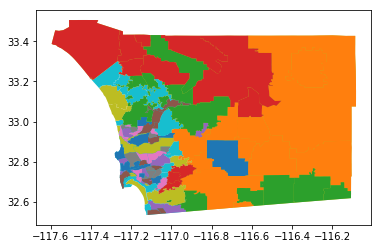

In [10]:
com.plot(column='code')

Now let's get the active businesses dataset from 

In [14]:
businesses = pd.read_csv('http://seshat.datasd.org/ttcs/sd_active_businesses_datasd.csv')

In [20]:
businesses.head().T

,0,1,2,3,4
account_key,2017014278,2017013866,2017013873,2017013871,2017013870
address_str,10640 scripps ranch blvd,5085 september st,827 beryl st,2704 boston ave,1502 mesa brook st
apt_suite,101,NaN,NaN,NaN,NaN
bus_start_dt,2017-08-23,2015-09-01,2015-09-01,2015-09-01,2015-09-01
business_owner_name,miriam chor freitas,robert burke,robert doll,jose m espinozanaranjo & maria m dadaespinoza,feliz h blanco & idalia contreras ochoa
business_phone,(858) 217-5770,NaN,NaN,NaN,NaN
city,san diego,san diego,san diego,san diego,san diego
creation_dt,2017-09-27,2017-09-27,2017-09-27,2017-09-27,2017-09-27
doing_bus_as_name,miriam chor freitas lcsw,robert burke,robert doll,jose m espinozanaranjo & maria m dadaespinoza,feliz h blanco & idalia contreras ochoa
expiration_dt,2018-08-31,2018-08-31,2018-08-31,2018-08-31,2018-08-31


In [23]:
## Create a new GeoPandas frame, converting the targetlongitude and targetlatitude
## colums to a Shapely Point and assigning it to the frame's geometry
from shapely.geometry import Point

bus_g = gpd.GeoDataFrame(businesses, geometry=
                        [Point(x,y) for x,y in zip(businesses.lon, businesses.lat)])

In [37]:
from geopandas import gpd 

# Quickly restrict dataset to only those in the county. 
x_min, y_min, x_max, y_max = com.geometry.total_bounds
_1 = bus_g[ (bus_g.lon <= x_max) &  (bus_g.lat <= y_max) & (bus_g.lon >= x_min) &  (bus_g.lat >= y_min)  ]

pointInPoly = gpd.sjoin(_1, com, op='intersects') # Probably will be slow
pointInPoly

,account_key,address_str,apt_suite,bus_start_dt,business_owner_name,business_phone,city,creation_dt,doing_bus_as_name,expiration_dt,...,pmb_box,po_box,state,zip,BID,geometry,index_right,type,name,code
0,2017014278,10640 scripps ranch blvd,101,2017-08-23,miriam chor freitas,(858) 217-5770,san diego,2017-09-27,miriam chor freitas lcsw,2018-08-31,...,NaN,NaN,CA,92131-1095,NaN,POINT (-117.1103214 32.9119358),71,city,SAN DIEGO,SD
1,2017013866,5085 september st,NaN,2015-09-01,robert burke,NaN,san diego,2017-09-27,robert burke,2018-08-31,...,NaN,NaN,CA,92110-1222,NaN,POINT (-117.187049 32.78008),71,city,SAN DIEGO,SD
2,2017013873,827 beryl st,NaN,2015-09-01,robert doll,NaN,san diego,2017-09-27,robert doll,2018-08-31,...,NaN,NaN,CA,92109-2004,NaN,POINT (-117.2567344 32.8030564),71,city,SAN DIEGO,SD
3,2017013871,2704 boston ave,NaN,2015-09-01,jose m espinozanaranjo & maria m dadaespinoza,NaN,san diego,2017-09-27,jose m espinozanaranjo & maria m dadaespinoza,2018-08-31,...,NaN,NaN,CA,92113-3708,NaN,POINT (-117.1358106 32.6940135),71,city,SAN DIEGO,SD
4,2017013870,1502 mesa brook st,NaN,2015-09-01,feliz h blanco & idalia contreras ochoa,NaN,san diego,2017-09-27,feliz h blanco & idalia contreras ochoa,2018-08-31,...,NaN,NaN,CA,92114-7875,NaN,POINT (-117.0487706 32.69329099999999),71,city,SAN DIEGO,SD
5,2017013869,4775 monongahela st,NaN,2015-09-01,paul v saadieh,NaN,san diego,2017-09-27,paul v saadieh,2018-08-31,...,NaN,NaN,CA,92117-2419,NaN,POINT (-117.2283866 32.8344767),71,city,SAN DIEGO,SD
6,2017013867,302 washington st,150-31,2015-09-01,scott corich,NaN,san diego,2017-09-27,scott corich,2018-08-31,...,NaN,NaN,CA,92103-2110,Hillcrest,POINT (-117.1626179 32.7502925),71,city,SAN DIEGO,SD
7,2017013865,2464 fenton pkwy,207,2015-09-01,eduardo d galvan & nallely p padilla,NaN,san diego,2017-09-27,eduardo d galvan & nallely p padilla,2018-08-31,...,NaN,NaN,CA,92108-6705,NaN,POINT (-117.1314841 32.7804636),71,city,SAN DIEGO,SD
8,2017013874,2616 highland ave,5,2015-09-01,ketkeo inthavong,NaN,san diego,2017-09-27,ketkeo inthavong,2018-08-31,...,NaN,NaN,CA,92105-4371,NaN,POINT (-117.0989261 32.73363010000001),71,city,SAN DIEGO,SD
9,2017013863,4584 f st,NaN,2015-09-01,clarence e davis sr,NaN,san diego,2017-09-27,clarence e davis sr,2018-08-31,...,NaN,NaN,CA,92102-3664,NaN,POINT (-117.095833 32.713745),71,city,SAN DIEGO,SD


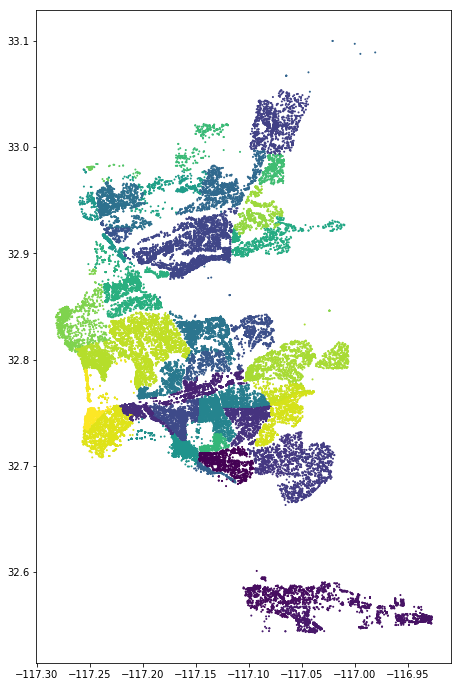

In [53]:
f, ax = plt.subplots(1, figsize=(15, 12))
pointInPoly[pointInPoly['type'] == 'sd_community'].plot(ax=ax, column='index_right', cmap='viridis', markersize=1)

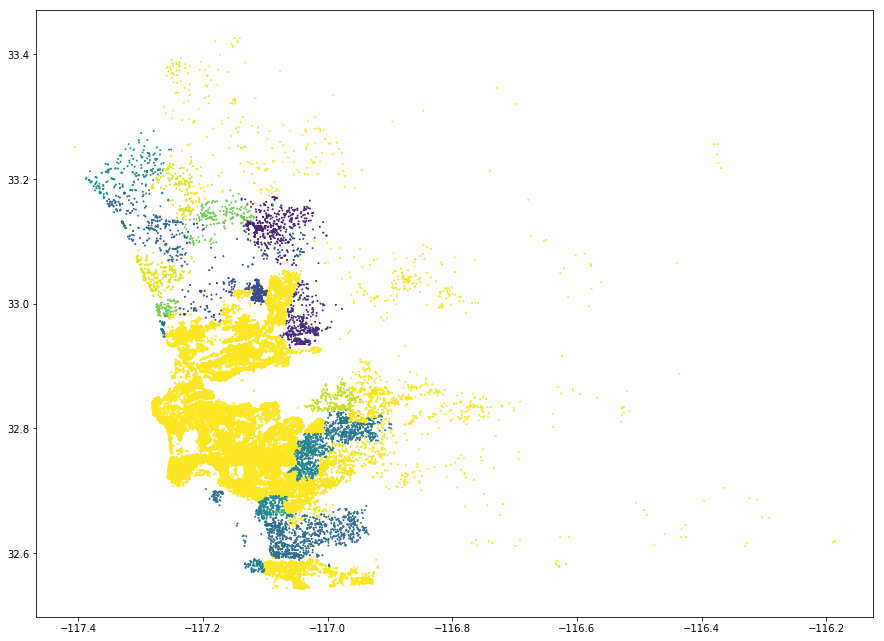

In [55]:
f, ax = plt.subplots(1, figsize=(15, 12))
pointInPoly[pointInPoly['type'] == 'city'].plot(ax=ax, column='index_right', cmap='viridis', markersize=1)

In [48]:
_1 = pointInPoly[pointInPoly.account_key.isin([1986007038, 2017007631, 1995005952]) ].sort_values('account_key')

_1


,account_key,address_str,apt_suite,bus_start_dt,business_owner_name,business_phone,city,creation_dt,doing_bus_as_name,expiration_dt,...,pmb_box,po_box,state,zip,BID,geometry,index_right,type,name,code
71647,1986007038,7060 clairemont mesa blvd,NaN,1986-05-30,southern california permanente medical group,(619) 584-5000,san diego,1986-05-30,southern california permanente medical group,2017-06-30,...,NaN,NaN,CA,92111-1003,NaN,POINT (-117.1648259 32.8336456),71,city,SAN DIEGO,SD
71647,1986007038,7060 clairemont mesa blvd,NaN,1986-05-30,southern california permanente medical group,(619) 584-5000,san diego,1986-05-30,southern california permanente medical group,2017-06-30,...,NaN,NaN,CA,92111-1003,NaN,POINT (-117.1648259 32.8336456),96,sd_community,KEARNY MESA,50
65280,1995005952,1617 quivira rd,NaN,1995-06-10,ghio mario a,(619) 224-3551,san diego,1995-06-14,world famous tuna jerky,2017-06-30,...,NaN,NaN,CA,92109-7801,NaN,POINT (-117.2378484 32.7646755),71,city,SAN DIEGO,SD
65280,1995005952,1617 quivira rd,NaN,1995-06-10,ghio mario a,(619) 224-3551,san diego,1995-06-14,world famous tuna jerky,2017-06-30,...,NaN,NaN,CA,92109-7801,NaN,POINT (-117.2378484 32.7646755),132,sd_community,MISSION BAY PARK,17
3779,2017007631,6196 caminito sacate,NaN,2015-06-01,mika capital inc,(619) 540-5400,san diego,2017-06-28,mika capital inc,2018-05-31,...,NaN,NaN,CA,92120-3156,NaN,POINT (-117.0613654 32.7955807),71,city,SAN DIEGO,SD
3779,2017007631,6196 caminito sacate,NaN,2015-06-01,mika capital inc,(619) 540-5400,san diego,2017-06-28,mika capital inc,2018-05-31,...,NaN,NaN,CA,92120-3156,NaN,POINT (-117.0613654 32.7955807),126,sd_community,NAVAJO,20


In [49]:
pointInPoly.groupby('account_key')